<a href="https://colab.research.google.com/github/JRafaQuadros91/testeApollo/blob/main/testeApollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Apollo
## João Rafael Quadros dos Santos

Exercicio 3 : 

In [39]:
# configs do pandas e numpy
pd.set_option('display.max_rows' , None) # Configurando pandas para não delimitar apresentação de linhas ou colunas
pd.set_option('display.max_columns' , None)

# Configurando pandas para não mostrar notação cientifica para números:

pd.set_option('display.float_format' , lambda x: '%.2f' % x)

In [72]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
%matplotlib inline 

In [41]:
# pulling arquivo data do github
!git clone https://github.com/JRafaQuadros91/testeApollo.git

fatal: destination path 'testeApollo' already exists and is not an empty directory.


In [42]:
# criando dataset

df = pd.read_csv("/content/testeApollo/data.csv")

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,ca,thal,num
0,63.00,1.00,1.00,145.00,233.00,1.00,2.00,150.00,0.00,2.30,3.00,0.0,6.0,0
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,2
2,67.00,1.00,4.00,120.00,229.00,0.00,2.00,129.00,1.00,2.60,2.00,2.0,7.0,1
3,37.00,1.00,3.00,130.00,250.00,0.00,0.00,187.00,0.00,3.50,3.00,0.0,3.0,0
4,41.00,0.00,2.00,130.00,204.00,0.00,2.00,172.00,0.00,1.40,1.00,0.0,3.0,0


In [44]:
# verificando o dataset

# Verificando quantidade de linhas e colunas
print('Linhas: ', df.shape[0])
print('Colunas: ' , df.shape[1])

Linhas:  303
Colunas:  14


In [45]:
#descrevendo
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00


Respondendo a questao 3

In [46]:
df1 = df[(df['age']>=40) & (df['chol']>= 240)]

df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,ca,thal,num
1,67.00,1.00,4.00,160.00,286.00,0.00,2.00,108.00,1.00,1.50,2.00,3.0,3.0,2
6,62.00,0.00,4.00,140.00,268.00,0.00,2.00,160.00,0.00,3.60,3.00,2.0,3.0,3
7,57.00,0.00,4.00,120.00,354.00,0.00,0.00,163.00,1.00,0.60,1.00,0.0,3.0,0
8,63.00,1.00,4.00,130.00,254.00,0.00,2.00,147.00,0.00,1.40,2.00,1.0,7.0,2
11,56.00,0.00,2.00,140.00,294.00,0.00,2.00,153.00,0.00,1.30,2.00,0.0,3.0,0


In [47]:
# Verificando quantidade de linhas e colunas
print('Linhas: ', df1.shape[0])
print('Colunas: ' , df1.shape[1])

Linhas:  153
Colunas:  14


In [62]:
colesterol = df1['age'].sum(axis = 0) / df['age'].sum(axis = 0) * 100
print(f' Porcentagem de colesterol alto é',colesterol,'%')

 Porcentagem de colesterol alto é 52.112761442861476 %


# Ao que parece, quando numero de fast blood sugar for maior que 120mg/dl recebe o valor True = 1 , ou seja, tem alto teor de açucar no sangue

In [66]:
df2 = df1[df1['fbs'] == 1]
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,ca,thal,num
12,56.00,1.00,3.00,130.00,256.00,1.00,2.00,142.00,1.00,0.60,2.00,1.0,6.0,2
21,58.00,0.00,1.00,150.00,283.00,1.00,2.00,162.00,0.00,1.00,1.00,0.0,3.0,0
39,61.00,1.00,3.00,150.00,243.00,1.00,0.00,137.00,1.00,1.00,2.00,0.0,3.0,0
48,65.00,0.00,3.00,140.00,417.00,1.00,2.00,157.00,0.00,0.80,1.00,1.0,3.0,0
63,54.00,0.00,3.00,135.00,304.00,1.00,0.00,170.00,0.00,0.00,1.00,0.0,3.0,0


In [67]:
# Verificando quantidade de linhas e colunas
print('Linhas: ', df2.shape[0])
print('Colunas: ' , df2.shape[1])

Linhas:  25
Colunas:  14


In [71]:
acucar = df2['age'].sum(axis = 0) / df['age'].sum(axis = 0) * 100
print(f' Porcentagem de açucar alto no sangue é',acucar,'%')

 Porcentagem de açucar alto no sangue é 8.529857532585632 %


# verificando correlação entre colesterol alto e alto teor de açucar no sangue com hipertrofia ventricular esquerda

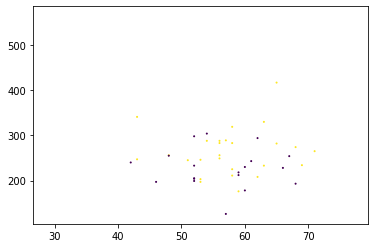

In [76]:
x = df['age']
y = df['chol']
z = df['fbs']
t = df['restecg']
plt.scatter(x,y,z,t)

In [75]:
reg = LinearRegression()

In [85]:
chol = df['chol'].values.reshape(-1,1) #variável independente
fbs = df['fbs'].values.reshape(-1,1) #variável independente
restecg  = df['restecg'].values.flatten()      #variável dependente

In [86]:
reg.fit(chol,fbs,restecg)

LinearRegression()

In [89]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalrest,exang,oldpeak,slope,num
age,1.00,-0.10,0.10,0.28,0.21,0.12,0.15,-0.39,0.09,0.20,0.16,0.22
sex,-0.10,1.00,0.01,-0.06,-0.20,0.05,0.02,-0.05,0.15,0.10,0.04,0.22
cp,0.10,0.01,1.00,-0.04,0.07,-0.04,0.07,-0.33,0.38,0.20,0.15,0.41
trestbps,0.28,-0.06,-0.04,1.00,0.13,0.18,0.15,-0.05,0.06,0.19,0.12,0.16
chol,0.21,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.05,-0.00,0.07
fbs,0.12,0.05,-0.04,0.18,0.01,1.00,0.07,-0.01,0.03,0.01,0.06,0.06
restecg,0.15,0.02,0.07,0.15,0.17,0.07,1.00,-0.08,0.08,0.11,0.13,0.18
thalrest,-0.39,-0.05,-0.33,-0.05,-0.00,-0.01,-0.08,1.00,-0.38,-0.34,-0.39,-0.42
exang,0.09,0.15,0.38,0.06,0.06,0.03,0.08,-0.38,1.00,0.29,0.26,0.40
oldpeak,0.20,0.10,0.20,0.19,0.05,0.01,0.11,-0.34,0.29,1.00,0.58,0.50


In [91]:
chol1 = df['chol']
fbs1 = df['fbs']
restecg1 = df['restecg']

r = chol1.corr(restecg1) #Calcula a correlação entre colesterol e doenca
print('Correlação:', r)

Correlação: 0.17104253199211222


In [92]:
p = fbs1.corr(restecg1)
print('Correlação:', p)

Correlação: 0.06956449708140452


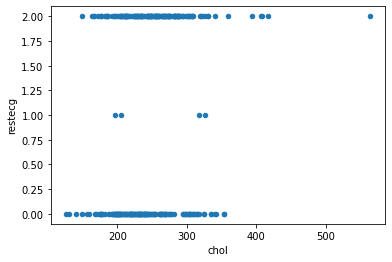

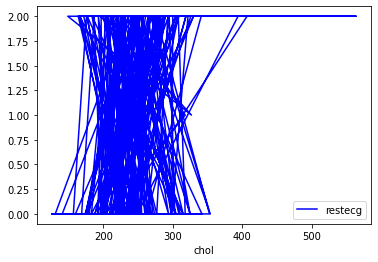

In [94]:
aux = df.plot.scatter('chol','restecg')
df.plot.line(x='chol',y='restecg', style='b')

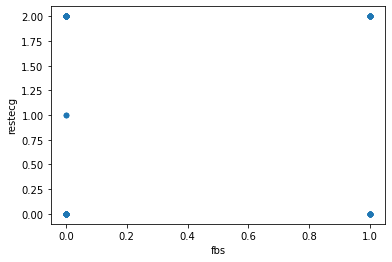

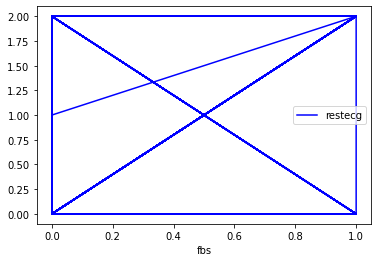

In [95]:
aux = df.plot.scatter('fbs','restecg')
df.plot.line(x='fbs',y='restecg', style='b')

# Pela correlação e os graficos , podemos dizer que quanto mais alto o nivel de colesterol maior o valor de restecg tendendo a 2, bem como quanto menor o valor de fbs , menor o valor de restecg tendendo a 0. Apesar da correlação ser mais forte entre o colesterol e o resteg = 2, ao juntar as duas informações podemos dizer que a chance é maior quando o sujeito possui as duas situações.